# AR(p) processes

In [1]:
# import relevante libraries
import pandas as pd
import numpy as np
from numpy.linalg import inv

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from helper import ols, tsplot

Generating an AR(1), i.e $Y_t = \alpha Y_{t-1} + \epsilon_t $

In [2]:
# function to generate an AR(1)
def generateAR1(alpha, sample_size=1000):
    y = epsilon = np.random.normal(size=sample_size)

    for t in range(sample_size):
        y[t] = alpha*y[t-1] + epsilon[t]
    return np.reshape(y,(sample_size,1))

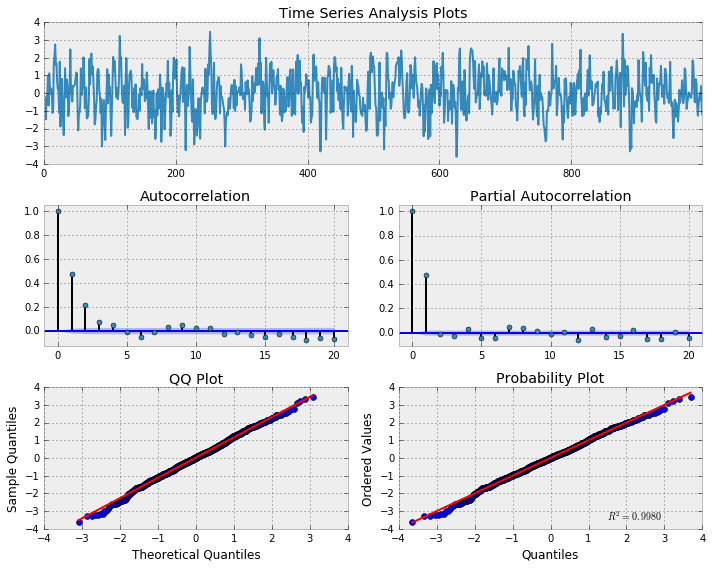

In [3]:
ar1 = generateAR1(alpha=0.5)
tsplot(np.reshape(ar1,(1000,)), lags=20)

Monte Carlo Study for OLS when estimating AR(1) process

In [4]:
# simulation setting
sample_size = 1000
repetitions = 10000
alpha = 1 

# empty array to store the results
alpha_hat = np.empty([repetitions])

for i in range(repetitions):
    # generate data 
    ar1 = generateAR1(alpha, sample_size)
    X = ar1[100:(sample_size-1),]
    y = ar1[101:sample_size,]
    # estimate with ols
    alpha_hat[i] = ols(X,y)
    
print np.mean(alpha_hat), np.std(alpha_hat)   

0.998209171094 0.00322861150863


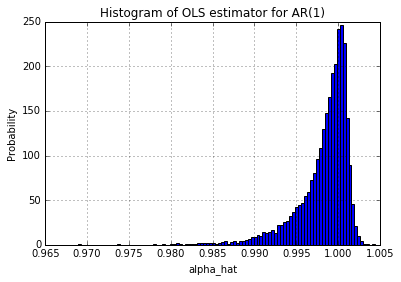

In [5]:
count, bins, ignored = plt.hist(alpha_hat, 100, normed=True)
plt.xlabel('alpha_hat')
plt.ylabel('Probability')
plt.title('Histogram of OLS estimator for AR(1)')
plt.grid(True)
plt.show()

In the unit root case, i.e. $\alpha=1$, the estimator is $\chi^2$-Verteilt! If we do the same experiment with $\alpha<1$, the estimater will be normal around $\alpha$.